In [1]:
import pandas as pd
from src.wall import *
from src.openings import *
from src.viz import fig_3D_lattice,fig_3D_buildup, fig_section_view

In [2]:
# Tes configs globales panneau
panel_id = "a"
panel_width = 6000
panel_height = 3500
openings = [Opening(1500,1750,1500,2000), Opening(4500,1750,1500,2500)]



# 
general = {
    'panel_id': 'a',
    'panel_width': 6000,
    'panel_height': 3500,
    'openings': [[1500, 1750, 1500, 2000], [4500,1750,1500,2500]],  # Liste de tuples/listes (sérialisable)
    'opening_voids': [] # Optionnel
}
# Ta config lattice (ossature principale)
lattice = {
    'vertical_pitch': 695,
    'horizontal_pitch': 695,
    'slat_width': 120,
    'panel_type': '5L180',
    'include_insulation': True
}

# Ta config couche
layer_m2 = {
    'y_min': -100-2*13,
    'y_max': -100-13,
    'layer_index': '-2',
    'name': 'BA 13',
    'layer_type': 'battened',
    'layer_pitch': 600,
    'layer_orientation': 'horizontal',
    'batten_width': 0,
    'include_insulation': True,
    'materials': {'batten': 'Douglas', 'insulation': 'BA13'}
}

layer_m1 = {
    'y_min': -100-13,
    'y_max': -100,
    'layer_index': '-1',
    'name': 'BA 13',
    'layer_type': 'battened',
    'layer_pitch': 600,
    'layer_orientation': 'horizontal',
    'batten_width': 0,
    'include_insulation': True,
    'materials': {'batten': 'Douglas', 'insulation': 'BA13'}
}

layer_0 = {
    'y_min': -100,
    'y_max': 0,
    'layer_index': '0',
    'name': 'Int ins - Mineral Wool 100mm batten 40mm',
    'layer_type': 'battened',
    'layer_pitch': 600,
    'layer_orientation': 'horizontal',
    'batten_width': 40,
    'include_insulation': True,
    'materials': {'batten': 'Douglas', 'insulation': 'Mineral Wool'}
}

layer_6 = {
    'y_min': 180,
    'y_max': 260,
    'layer_index': '6',
    'name': 'Ext ins - Mineral Wool 80mm batten 40mm',
    'layer_type': 'battened',
    'layer_pitch': 600,
    'layer_orientation': 'horizontal',
    'batten_width': 40,
    'include_insulation': True,
    'materials': {'batten': 'Douglas', 'insulation': 'Mineral Wool'}
}

layer_7 = {
    'y_min': 260,
    'y_max': 340,
    'layer_index': '7',
    'name': 'Ext ins - Mineral Wool 80mm batten 40mm',
    'layer_type': 'battened',
    'layer_pitch': 600,
    'layer_orientation': 'vertical',
    'batten_width': 40,
    'include_insulation': True,
    'materials': {'batten': 'Douglas', 'insulation': 'Mineral Wool'}
}

layer_8 = {
    'y_min': 340,
    'y_max': 360,
    'layer_index': '8',
    'name': 'Sous structure verticale',
    'layer_type': 'battened',
    'layer_pitch': 600,
    'layer_orientation': 'horizontal',
    'batten_width': 20,
    'include_insulation': False,
    'materials': {'batten': 'Douglas', 'insulation': 'Mineral Wool'}
}

layer_9 = {
    'y_min': 360,
    'y_max': 373,
    'layer_index': '9',
    'name': 'Fibro ciment',
    'layer_type': 'battened',
    'layer_pitch': 600,
    'layer_orientation': 'horizontal', # pb si verticale
    'batten_width': 0,
    'include_insulation': True,
    'materials': {'batten': 'Douglas', 'insulation': 'fibro ciment'}
}

layers = [layer_m1, layer_m2, layer_0, layer_6,layer_7, layer_8, layer_9]


# ---- GÉNÉRATION DU COMPLEXE MUR ----
  # Mets ici toutes tes couches, sous forme de liste

buildup_config = {
    'general':general,
    'lattice':lattice,
    'layers':layers
}


def create_buildup_from_config(config):
    # 1. Extraction et préparation des globals
    g = config['general']
    
    # Conversion des listes brutes en objets Opening
    ops = [Opening(*args) for args in g.get('openings', [])]
    
    # Conversion des voids si nécessaire (selon ton format de stockage pour Polygon)
    # voids = ...
    
    # 2. Appel propre à ta fonction existante
    return generate_wall_buildup(
        panel_id=g['panel_id'],
        panel_width=g['panel_width'],
        panel_height=g['panel_height'],
        openings=ops,
        opening_voids=g.get('opening_voids', ()),
        lattice_config=config['lattice'],
        layer_configs=config['layers']
    )

buildup = create_buildup_from_config(buildup_config)

In [3]:
fig = fig_3D_buildup(buildup)
fig.show()

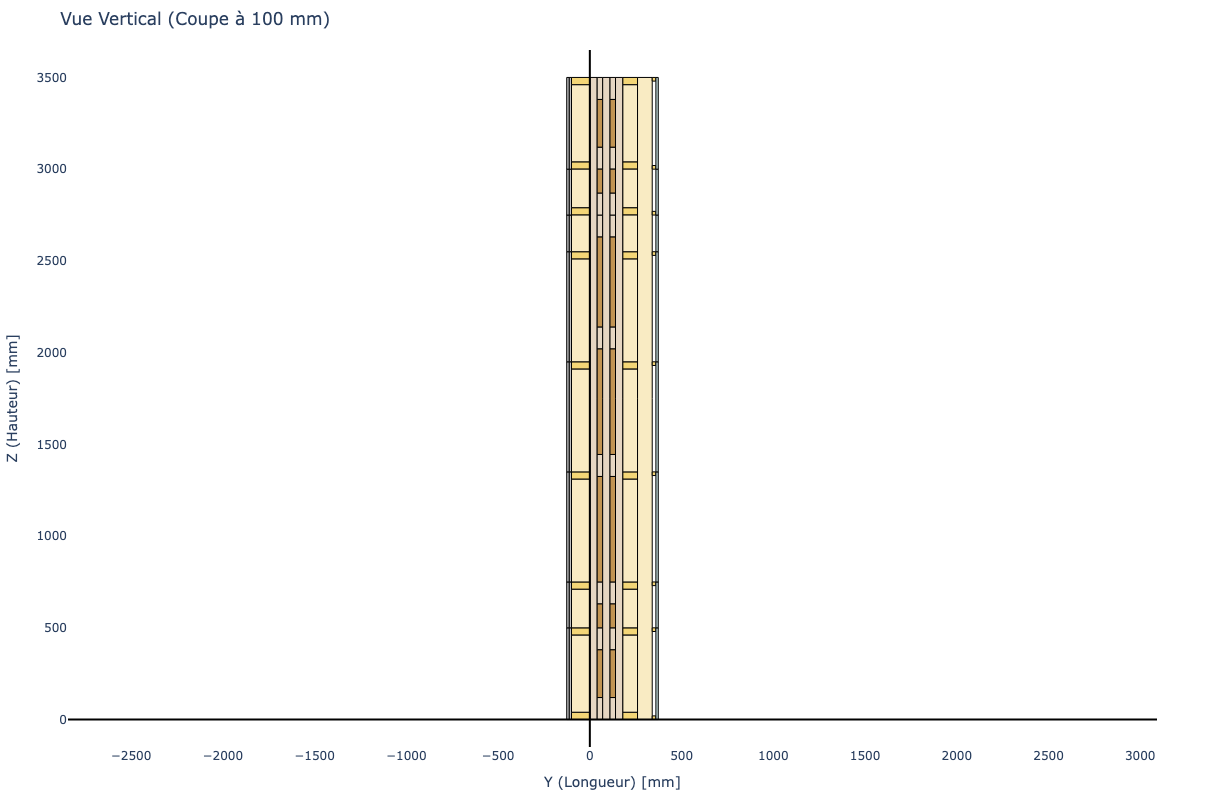

In [4]:
fig = fig_section_view(buildup, view_type='vertical', cut_pos=None)
fig.show()

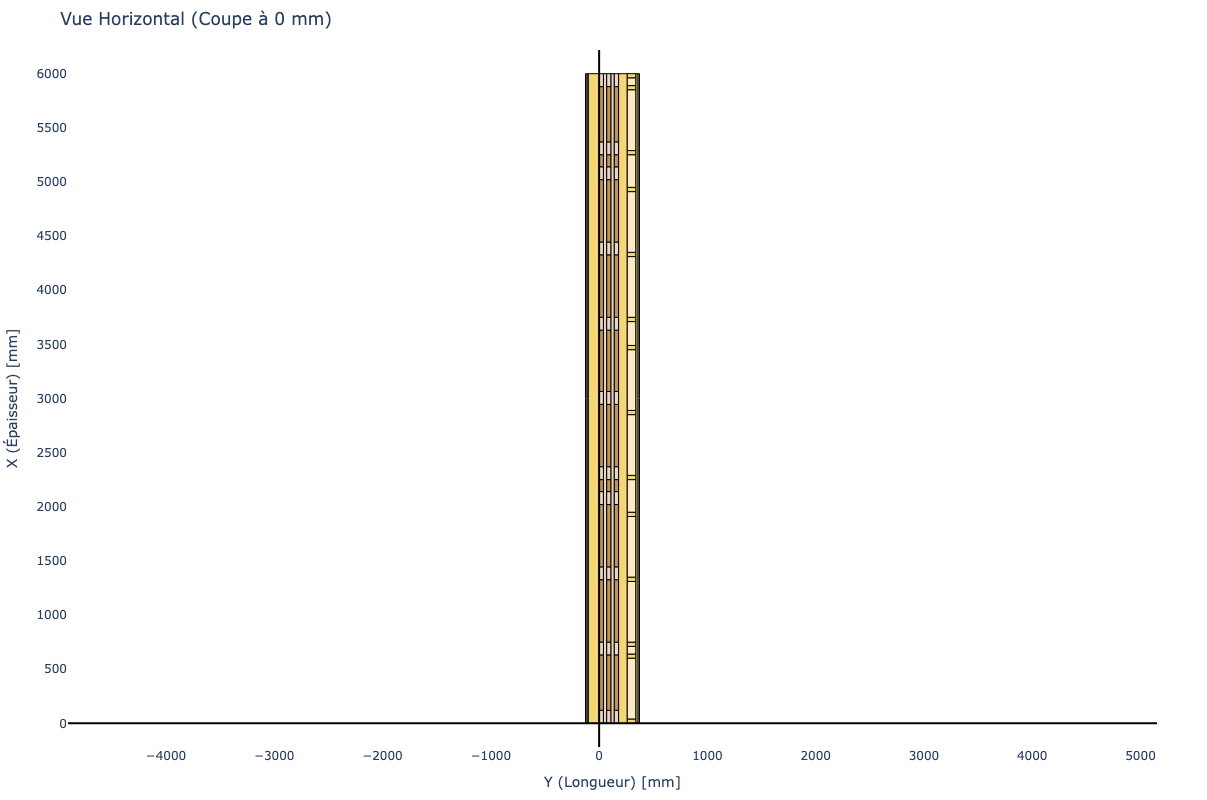

In [5]:
fig = fig_section_view(buildup, view_type='horizontal', cut_pos=0)
fig.show()

In [6]:
# Lattice generator
lattice_config = {
    'panel_id': 'a',
    'panel_width': 6000,
    'panel_height': 3500,
    'vertical_pitch': 695,
    'horizontal_pitch': 695,
    'slat_width': 120,
    'panel_type': '5L180',
    'openings': [Opening(1500,1750,1500,2000),Opening(4500,1750,1500,2500)],
    'include_insulation': True
}
#     'opening_voids': ,   # precise boolean geoms (optional)
# center_x: float , center_z: float , width: float , height: float

    
lattice = generate_lattice_layout(**lattice_config)

In [7]:
#lattice.elements_of_type('insulation')
#lattice.elements_of_type('slat')
#lattice.as_dict().keys() # ['elements', 'post_positions', 'traverse_positions', 'layer_ranges']
print(lattice.as_dict()['post_positions'])
print(lattice.as_dict()['traverse_positions'])
print(lattice.as_dict()['layer_ranges'])

[0.0, 630.0, 1325.0, 2020.0, 2250.0, 2945.0, 3630.0, 4325.0, 5020.0, 5250.0, 5880]
[0.0, 380.0, 630.0, 1325.0, 2020.0, 2630.0, 2750.0, 3000.0, 3380]
[(0.0, 40.0), (40.0, 70.0), (70.0, 110.0), (110.0, 140.0), (140.0, 180.0)]


In [8]:
df = pd.DataFrame(lattice.as_dict()['elements'])
df

,id,element_type,layer,orientation,x_min,x_max,y_min,y_max,z_min,z_max,length,width,thickness
0,a-L1-P0-1,slat,1,vertical,0.000000,120.000000,0.0,40.0,0.000000,3500.000000,3500.000000,120.000000,40.0
1,a-L1-P1-2,slat,1,vertical,630.000000,750.000000,0.0,40.0,0.000000,3500.000000,3500.000000,120.000000,40.0
2,a-L1-P2-3,slat,1,vertical,1325.000000,1445.000000,0.0,40.0,2751.000000,3500.000000,749.000000,120.000000,40.0
3,a-L1-P2-4,slat,1,vertical,1325.000000,1445.000000,0.0,40.0,0.000000,749.000000,749.000000,120.000000,40.0
4,a-L1-P3-5,slat,1,vertical,2020.000000,2140.000000,0.0,40.0,2751.000000,3500.000000,749.000000,120.000000,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,a-L5-I18,insulation,5,surface,749.999999,1325.000000,140.0,180.0,0.000000,749.000000,749.000000,575.000001,40.0
165,a-L5-I19,insulation,5,surface,749.999999,1325.000000,140.0,180.0,2751.000000,3500.000000,749.000000,575.000001,40.0
166,a-L5-I22,insulation,5,surface,749.232188,749.292893,140.0,180.0,749.292893,749.359871,0.066978,0.060705,40.0
167,a-L5-I23,insulation,5,surface,749.292893,749.359871,140.0,180.0,749.232188,749.292893,0.060705,0.066978,40.0


In [9]:
fig = fig_3D_lattice(lattice)
fig.show()

In [10]:
# Layer config

layer_config = {
    'panel_id': 'a',
    'panel_width': 6000,
    'panel_height': 3500,
    'openings': [Opening(1500,1750,1500,2000),Opening(4500,1750,1500,2500)],
    'y_min':180,
    'y_max':280,
    'layer_index': '6',
    'name': 'Ext ins - Mineral Wool 100mm batten 40mm',
    'layer_type':'battened',
    'layer_pitch':600,
    'layer_orientation':'horizontal',
    'batten_width': 40,
    'include_insulation': True,
    'materials':{'batten':'Douglas','insulation':'Mineral Wool'}
}

layer = generate_layer(**layer_config)

In [11]:
layer_config = {
    'panel_id': 'a',
    'panel_width': 6000,
    'panel_height': 3500,
    'openings': [Opening(1500,1750,1500,2000),Opening(4500,1750,1500,2500)],
    'y_min':180,
    'y_max':280,
    'layer_index': '6',
    'name': 'Ext ins - Mineral Wool 100mm batten 40mm',
    'layer_type':'battened',
    'layer_pitch':900,
    'layer_orientation':'horizontal',
    'batten_width': 60,
    'include_insulation': False,
    'materials':{'batten':'Douglas','insulation':'Mineral Wool'}
}

layer = generate_layer(**layer_config)

fig = fig_3D_lattice(layer)
fig.show()


In [12]:
from dataclasses import dataclass
from typing import Tuple
import numpy as np
import plotly.graph_objects as go
from shapely.geometry import Polygon, box
from shapely.ops import triangulate

# --- 1. Ta Classe Opening ---
@dataclass(frozen=True)
class Opening:
    center_x: float
    center_z: float
    width: float
    height: float

    @property
    def bounds(self) -> Tuple[float, float, float, float]:
        half_w = self.width / 2.0
        half_h = self.height / 2.0
        return (
            self.center_x - half_w,
            self.center_z - half_h,
            self.center_x + half_w,
            self.center_z + half_h,
        )

    def to_polygon(self):
        x_min, z_min, x_max, z_max = self.bounds
        return box(x_min, z_min, x_max, z_max)

# --- 2. Fonction de Visualisation (Core) ---
def create_extruded_polygon_trace(polygon_2d, y_min, y_max, color='gray', name='Mur'):
    # A. Triangulation
    raw_triangles = triangulate(polygon_2d)
    valid_triangles = [t for t in raw_triangles if polygon_2d.contains(t.centroid)]
    
    vertices, ii, jj, kk = [], [], [], []
    
    def add_tri(p1, p2, p3, y_level):
        base = len(vertices)
        vertices.extend([[p1[0], y_level, p1[1]], [p2[0], y_level, p2[1]], [p3[0], y_level, p3[1]]])
        ii.append(base); jj.append(base+1); kk.append(base+2)

    # B. Faces Avant/Arrière
    for t in valid_triangles:
        c = list(t.exterior.coords)
        add_tri(c[0], c[2], c[1], y_min) 
        add_tri(c[0], c[1], c[2], y_max) 

    # C. Tranches Latérales
    boundaries = [polygon_2d.exterior] + list(polygon_2d.interiors)
    for b in boundaries:
        coords = list(b.coords)
        for k in range(len(coords)-1):
            p1, p2 = coords[k], coords[k+1]
            idx = len(vertices)
            # Quad (2 triangles)
            vertices.extend([[p1[0], y_min, p1[1]], [p2[0], y_min, p2[1]], [p2[0], y_max, p2[1]]])
            ii.extend([idx, idx+1, idx+2])
            vertices.extend([[p1[0], y_min, p1[1]], [p2[0], y_max, p2[1]], [p1[0], y_max, p1[1]]])
            ii.extend([idx+3, idx+4, idx+5])

    v = np.array(vertices)
    if len(v) == 0: return go.Mesh3d()
    
    return go.Mesh3d(
        x=v[:,0], y=v[:,1], z=v[:,2],
        i=ii, j=jj, k=kk,
        color=color, opacity=1, flatshading=True, name=name
    )

# --- 3. Script d'Exécution ---
config = {
    'panel_width': 6000,
    'panel_height': 3500,
    'openings': [Opening(1500, 1750, 1500, 2000), Opening(4500, 1750, 1500, 2500)],
    'thickness': 200
}

# Création Géométrie 2D
wall_shape = box(0, 0, config['panel_width'], config['panel_height'])
for op in config['openings']:
    wall_shape = wall_shape.difference(op.to_polygon())

# Création Mesh 3D
trace = create_extruded_polygon_trace(
    wall_shape, 
    y_min=0, 
    y_max=config['thickness'], 
    color='#A9A9A9', 
    name='Mur Béton'
)

# Affichage Plotly
fig = go.Figure(data=[trace])
fig.update_layout(scene=dict(aspectmode='data'), title="Mur Béton avec Ouvertures (Extrusion Dynamique)")
fig.show()


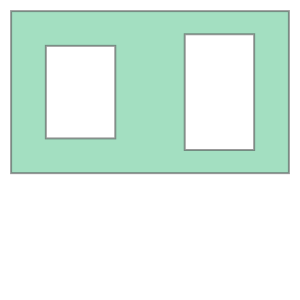

In [13]:
wall_shape

In [15]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from dataclasses import dataclass
from typing import Tuple, List
from shapely.geometry import Polygon, box
from shapely.ops import triangulate

# --- 1. Classes Métier (Restées simples) ---
@dataclass(frozen=True)
class Opening:
    center_x: float; center_z: float; width: float; height: float
    @property
    def bounds(self):
        return (self.center_x - self.width/2, self.center_z - self.height/2,
                self.center_x + self.width/2, self.center_z + self.height/2)
    def to_polygon(self):
        return box(*self.bounds)

# --- 2. Le Moteur "Brep -> Dataframe" ---
def generate_brep_dataframes(wall_polygon_2d: Polygon, thickness: float, layer_name: str = "Core"):
    """
    Génère les Dataframes Vertices et Triangles pour un volume extrudé.
    Retourne: (df_vertices, df_triangles)
    """
    y_min, y_max = 0.0, thickness

    # A. Triangulation de la surface 2D (Shapely)
    # Triangles bruts sur le plan X-Z
    raw_tris = triangulate(wall_polygon_2d)
    valid_tris = [t for t in raw_tris if wall_polygon_2d.contains(t.centroid)]

    # --- Construction Vectorielle ---
    # On va accumuler les sommets et les indices.
    # Pour la performance, on utilise des listes qu'on convertira en DataFrame à la fin.
    
    v_list = [] # [[x, y, z], ...]
    t_list = [] # [[i, j, k], ...]
    
    current_idx = 0

    # Fonction helper pour ajouter des faces
    def add_face(coords_xyz):
        nonlocal current_idx
        # coords_xyz est une liste de 3 points [[x,y,z], [x,y,z], [x,y,z]]
        v_list.extend(coords_xyz)
        t_list.append([current_idx, current_idx+1, current_idx+2])
        current_idx += 3

    # B. Faces Avant (y=0) et Arrière (y=thickness)
    for tri in valid_tris:
        c = list(tri.exterior.coords) # [(x,z), (x,z), (x,z), (x,z)] - le dernier redouble le premier
        p1, p2, p3 = c[0], c[1], c[2] 
        
        # Shapely est souvent CCW (Counter Clockwise).
        # Face Arrière (Y=0) -> Normale vers -Y -> Ordre p1, p3, p2
        add_face([[p1[0], y_min, p1[1]], [p3[0], y_min, p3[1]], [p2[0], y_min, p2[1]]])
        
        # Face Avant (Y=thickness) -> Normale vers +Y -> Ordre p1, p2, p3
        add_face([[p1[0], y_max, p1[1]], [p2[0], y_max, p2[1]], [p3[0], y_max, p3[1]]])

    # C. Tranches Latérales (Extrusion)
    # On itère sur toutes les frontières (extérieure + trous)
    boundaries = [wall_polygon_2d.exterior] + list(wall_polygon_2d.interiors)
    
    for boundary in boundaries:
        coords = list(boundary.coords)
        for k in range(len(coords)-1):
            p1 = coords[k]   # (x, z)
            p2 = coords[k+1] # (x, z)
            
            # Quad latéral formé de 2 triangles
            # Triangle 1
            add_face([[p1[0], y_min, p1[1]], [p2[0], y_min, p2[1]], [p2[0], y_max, p2[1]]])
            # Triangle 2
            add_face([[p1[0], y_min, p1[1]], [p2[0], y_max, p2[1]], [p1[0], y_max, p1[1]]])

    # --- Création des DataFrames ---
    df_v = pd.DataFrame(v_list, columns=['X', 'Y', 'Z'])
    df_v['Layer'] = layer_name
    
    df_t = pd.DataFrame(t_list, columns=['I', 'J', 'K'])
    df_t['Layer'] = layer_name
    
    return df_v, df_t

# --- 3. Ta fonction d'Affichage (Optimisée) ---
def fig_project(df_vertices, df_triangles):
    """Affiche un ou plusieurs objets depuis les Dataframes"""
    
    # Si on a plusieurs objets concaténés, il faut gérer le décalage des indices I,J,K
    # Mais ici, générons une trace simple en assumant que df_triangles a les bons indices locaux 
    # ou que l'utilisateur a géré l'offset.
    
    fig = go.Figure(data=[go.Mesh3d(
        x=df_vertices.X, 
        y=df_vertices.Y, 
        z=df_vertices.Z,
        i=df_triangles.I, 
        j=df_triangles.J, 
        k=df_triangles.K,
        opacity=1,
        color='#A9A9A9', # Gris béton
        flatshading=True,
        name='Mur'
    )])

    fig.update_layout(
        scene=dict(aspectmode='data', xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
        title='Visualisation Brep (Pandas -> Plotly)',
        margin=dict(l=0, r=0, b=0, t=40)
    )
    return fig

# --- 4. EXEMPLE D'EXECUTION ---

# A. Config
config = {
    'panel_width': 6000, 'panel_height': 3500, 'thickness': 200,
    'openings': [Opening(1500, 1750, 1500, 2000), Opening(4500, 1750, 1500, 2500)]
}

# B. Géométrie 2D (Shapely)
wall_shape = box(0, 0, config['panel_width'], config['panel_height'])
for op in config['openings']:
    wall_shape = wall_shape.difference(op.to_polygon())

# C. Génération des DataFrames (C'est là que la magie opère)
df_verts, df_tris = generate_brep_dataframes(wall_shape, config['thickness'])

# D. Affichage
print(f"Généré {len(df_verts)} sommets et {len(df_tris)} triangles.")
# display(df_verts.head()) # Si tu es dans un notebook
fig = fig_project(df_verts, df_tris)
fig.show()


Généré 156 sommets et 52 triangles.


In [16]:
import pandas as pd
import numpy as np
from dataclasses import dataclass
from typing import Sequence, Dict, Optional, Tuple, List
from shapely.geometry import Polygon, box
from shapely.ops import triangulate

In [ ]:
# --- 1. Classes Dépendances (Simulées si pas importées) ---
# Dans ton vrai code: from .elements import Opening
@dataclass(frozen=True)
class Opening:
    center_x: float; center_z: float; width: float; height: float
    @property
    def bounds(self):
        return (self.center_x - self.width/2, self.center_z - self.height/2,
                self.center_x + self.width/2, self.center_z + self.height/2)
    def to_polygon(self):
        return box(*self.bounds)

In [ ]:
# --- 2. La Classe ConcreteLayout ---
@dataclass
class ConcreteLayout:
    layer_index: int       # Souvent 0 pour le Core
    name: str              # ex: "Voile Béton"
    thickness: float
    y_min: float
    y_max: float
    material: str          # ex: "C25/30"
    reinforcement_ratio: float = 0.0
    
    # Stockage de la géométrie maillée (Brep)
    df_vertices: Optional[pd.DataFrame] = None
    df_triangles: Optional[pd.DataFrame] = None

    def as_dict(self) -> Dict:
        return {
            "type": "ConcreteLayout",
            "layer_index": self.layer_index,
            "name": self.name,
            "thickness": self.thickness,
            "y_min": self.y_min,
            "y_max": self.y_max,
            "material": self.material,
            "vertex_count": len(self.df_vertices) if self.df_vertices is not None else 0
        }

# --- 3. Moteur de Maillage (Brep Generator) ---
def generate_brep_dataframes(
    wall_polygon_2d: Polygon, 
    thickness: float, 
    offset_y: float = 0.0, 
    layer_name: str = "Core"
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Génère les Dataframes (Vertices, Triangles) pour un volume extrudé.
    """
    y_min = offset_y
    y_max = offset_y + thickness

    # A. Triangulation 2D
    raw_tris = triangulate(wall_polygon_2d)
    # Filtre: garde les triangles DANS la matière
    valid_tris = [t for t in raw_tris if wall_polygon_2d.contains(t.centroid)]

    v_list = [] # [[x, y, z], ...]
    t_list = [] # [[i, j, k], ...]
    current_idx = 0

    def add_face(coords_xyz):
        nonlocal current_idx
        v_list.extend(coords_xyz)
        t_list.append([current_idx, current_idx+1, current_idx+2])
        current_idx += 3

    # B. Faces Avant/Arrière
    for tri in valid_tris:
        c = list(tri.exterior.coords)
        p1, p2, p3 = c[0], c[1], c[2]
        # Arrière (y_min) -> Normale -Y -> p1, p3, p2
        add_face([[p1[0], y_min, p1[1]], [p3[0], y_min, p3[1]], [p2[0], y_min, p2[1]]])
        # Avant (y_max) -> Normale +Y -> p1, p2, p3
        add_face([[p1[0], y_max, p1[1]], [p2[0], y_max, p2[1]], [p3[0], y_max, p3[1]]])

    # C. Tranches Latérales
    boundaries = [wall_polygon_2d.exterior] + list(wall_polygon_2d.interiors)
    for boundary in boundaries:
        coords = list(boundary.coords)
        for k in range(len(coords)-1):
            p1, p2 = coords[k], coords[k+1]
            # Quad Latéral (2 triangles)
            add_face([[p1[0], y_min, p1[1]], [p2[0], y_min, p2[1]], [p2[0], y_max, p2[1]]])
            add_face([[p1[0], y_min, p1[1]], [p2[0], y_max, p2[1]], [p1[0], y_max, p1[1]]])

    # Création DataFrames
    df_v = pd.DataFrame(v_list, columns=['X', 'Y', 'Z'])
    df_v['Layer'] = layer_name
    
    df_t = pd.DataFrame(t_list, columns=['I', 'J', 'K'])
    df_t['Layer'] = layer_name
    
    return df_v, df_t

# --- 4. Fonction Principale (Générateur) ---
def generate_concrete_layout(
    panel_id: str,
    panel_width: float,
    panel_height: float,
    thickness: float,
    openings: Sequence[Opening],
    y_min: float = 0.0,
    material: str = "Concrete C25/30"
) -> ConcreteLayout:
    
    # 1. Forme 2D
    wall_shape = box(0.0, 0.0, panel_width, panel_height)
    for op in openings:
        wall_shape = wall_shape.difference(op.to_polygon())
        
    # 2. Maillage 3D
    df_verts, df_tris = generate_brep_dataframes(
        wall_polygon_2d=wall_shape,
        thickness=thickness,
        offset_y=y_min,
        layer_name=f"{panel_id}_Core"
    )
    
    # 3. Objet
    return ConcreteLayout(
        layer_index=0,
        name=f"Core {material}",
        thickness=thickness,
        y_min=y_min,
        y_max=y_min + thickness,
        material=material,
        df_vertices=df_verts,
        df_triangles=df_tris
    )

# --- 5. TEST (Copie ça dans un notebook pour vérifier) ---

In [29]:
import plotly.graph_objects as go

# Config Test
config = {
    'panel_width': 6000, 'panel_height': 3500, 'thickness': 200,
    'openings': [Opening(1500, 1750, 1500, 2000), Opening(4500, 1750, 1500, 2500)]
}



# Génération
concrete_wall = generate_concrete_layout(
    panel_id="Wall-01",
    panel_width=config['panel_width'],
    panel_height=config['panel_height'],
    thickness=200,
    openings=config['openings'],
    y_min=0 # Décalage pour simuler une position dans le mur
)

print(f"Mur généré : {concrete_wall.name}")
print(f"Sommets : {len(concrete_wall.df_vertices)}")

# Viz rapide
df_v = concrete_wall.df_vertices
df_t = concrete_wall.df_triangles

fig = go.Figure(go.Mesh3d(
    x=df_v.X, y=df_v.Y, z=df_v.Z,
    i=df_t.I, j=df_t.J, k=df_t.K,
    color='lightgray', flatshading=True, opacity=1
))
x_min, x_max = df_v['X'].min(), df_v['X'].max()
y_min, y_max = df_v['Y'].min(), df_v['Y'].max()
z_min, z_max = df_v['Z'].min(), df_v['Z'].max()
axis_min = min(x_min, y_min, z_min)
axis_max = max(x_max, y_max, z_max)
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[axis_min, axis_max], title='X'),
        yaxis=dict(range=[axis_min, axis_max], title='Y'),
        zaxis=dict(range=[axis_min, axis_max], title='Z'),
        aspectmode='cube', # Astuce pour ne pas déformer la 3D
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.5))
    ),
    height=800,
    margin=dict(l=0, r=0, t=0, b=0),
    legend=dict(title="Couches (Cliquer pour masquer)") # Titre légende
)

fig.show()

Mur généré : Core Concrete C25/30
Sommets : 156


In [30]:
@dataclass
class CLTLayout:
    layer_index: int
    name: str              # ex: "CLT 100 C3s"
    thickness: float       # ex: 100
    y_min: float
    y_max: float
    nb_plies: int          # ex: 3
    ply_thicknesses: List[float] # ex: [30, 40, 30]
    orientations: List[str]      # ex: ["vertical", "horizontal", "vertical"]
    
    # Géométrie Brep (Le volume TOTAL du panneau)
    df_vertices: Optional[pd.DataFrame] = None
    df_triangles: Optional[pd.DataFrame] = None

    def as_dict(self) -> Dict:
        return {
            "type": "CLTLayout",
            "name": self.name,
            "thickness": self.thickness,
            "nb_plies": self.nb_plies,
            "vertex_count": len(self.df_vertices) if self.df_vertices is not None else 0
        }

def generate_clt_layout(
    panel_id: str,
    panel_width: float,
    panel_height: float,
    thickness: float,
    openings: Sequence[Opening],
    nb_plies: int = 3, # 3 ou 5
    y_min: float = 0.0
) -> CLTLayout:

    # 1. Calcul automatique des plis (simplifié pour l'exemple)
    # Pour un CLT 100mm 3 plis -> [33.3, 33.3, 33.3] ou [30, 40, 30]
    ply_th = thickness / nb_plies
    ply_thicknesses = [ply_th] * nb_plies
    
    # Orientation alternée standard: V - H - V
    orientations = ["vertical" if i % 2 == 0 else "horizontal" for i in range(nb_plies)]
    
    # 2. Géométrie 2D (Comme le béton)
    wall_shape = box(0.0, 0.0, panel_width, panel_height)
    for op in openings:
        wall_shape = wall_shape.difference(op.to_polygon())
        
    # 3. Maillage 3D (Volume global)
    # On génère un seul bloc pour tout le panneau CLT
    df_verts, df_tris = generate_brep_dataframes(
        wall_polygon_2d=wall_shape,
        thickness=thickness,
        offset_y=y_min,
        layer_name=f"{panel_id}_CLT_Core"
    )
    
    return CLTLayout(
        layer_index=0,
        name=f"CLT {int(thickness)} {nb_plies}plis",
        thickness=thickness,
        y_min=y_min,
        y_max=y_min + thickness,
        nb_plies=nb_plies,
        ply_thicknesses=ply_thicknesses,
        orientations=orientations,
        df_vertices=df_verts,
        df_triangles=df_tris
    )


In [31]:


import pandas as pd
from dataclasses import dataclass
from typing import Sequence, List, Optional
from shapely.geometry import box

# --- 1. La Classe CLTLayout ---
@dataclass
class CLTLayout:
    layer_index: int
    name: str
    thickness: float
    y_min: float
    y_max: float
    ply_thicknesses: List[float] # ex: [30, 40, 30]
    orientations: List[str]      # ex: ["vertical", "horizontal", "vertical"]
    
    # Géométrie: On stockera l'assemblage de TOUS les plis
    df_vertices: Optional[pd.DataFrame] = None
    df_triangles: Optional[pd.DataFrame] = None

# --- 2. Le Générateur Multi-Plis ---
def generate_clt_layout(
    panel_id: str,
    panel_width: float,
    panel_height: float,
    openings: Sequence[Opening],
    ply_thicknesses: List[float] = [30, 40, 30], # Par défaut: CLT 100
    y_min: float = 0.0
) -> CLTLayout:

    # 1. Calculs Préliminaires
    total_thickness = sum(ply_thicknesses)
    nb_plies = len(ply_thicknesses)
    # Orientation alternée par défaut (V-H-V...)
    orientations = ["vertical" if i % 2 == 0 else "horizontal" for i in range(nb_plies)]
    
    # 2. Forme 2D de base (commune à tous les plis)
    wall_shape = box(0.0, 0.0, panel_width, panel_height)
    for op in openings:
        wall_shape = wall_shape.difference(op.to_polygon())

    # 3. Génération Géométrique par Pli (Boucle d'empilement)
    all_verts_frames = []
    all_tris_frames = []
    current_offset_y = y_min
    
    # On garde un compteur global de vertex pour décaler les indices des triangles
    vertex_counter_global = 0 

    for i, ply_th in enumerate(ply_thicknesses):
        layer_name = f"{panel_id}_CLT_Ply_{i+1}"
        
        # Génération du Brep pour CE pli
        df_v, df_t = generate_brep_dataframes(
            wall_polygon_2d=wall_shape,
            thickness=ply_th,
            offset_y=current_offset_y,
            layer_name=layer_name
        )
        
        # AJUSTEMENT DES INDICES TRIANGLES (Crucial pour la fusion !)
        # Les indices de df_t commencent à 0. Il faut les décaler de vertex_counter_global
        df_t[['I', 'J', 'K']] += vertex_counter_global
        
        # Mise à jour du compteur global
        vertex_counter_global += len(df_v)
        
        # Stockage
        all_verts_frames.append(df_v)
        all_tris_frames.append(df_t)
        
        # On avance dans l'épaisseur pour le prochain pli
        current_offset_y += ply_th

    # 4. Fusion finale (Concaténation)
    df_final_verts = pd.concat(all_verts_frames, ignore_index=True)
    df_final_tris = pd.concat(all_tris_frames, ignore_index=True)

    # 5. Objet Retour
    return CLTLayout(
        layer_index=0,
        name=f"CLT {int(total_thickness)} ({'+'.join(map(str, map(int, ply_thicknesses)))})",
        thickness=total_thickness,
        y_min=y_min,
        y_max=y_min + total_thickness,
        ply_thicknesses=ply_thicknesses,
        orientations=orientations,
        df_vertices=df_final_verts,
        df_triangles=df_final_tris
    )


# --- EXÉCUTION TEST CLT ---

# 1. Génération
clt_wall = generate_clt_layout(
    panel_id="Mur-CLT-01",
    panel_width=config['panel_width'],
    panel_height=config['panel_height'],
    openings=config['openings'],
    ply_thicknesses=[30, 40, 30],  # TEST: 3 plis explicites
    y_min=0
)

print(f"Mur généré : {clt_wall.name}")
print(f"Sommets : {len(clt_wall.df_vertices)}")

# 2. Viz rapide (C'est exactement ton code actuel)
df_v = clt_wall.df_vertices
df_t = clt_wall.df_triangles

fig = go.Figure(go.Mesh3d(
    x=df_v.X, y=df_v.Y, z=df_v.Z,
    i=df_t.I, j=df_t.J, k=df_t.K,
    color='#D2B48C', # Couleur "Tan" (Bois) pour changer du gris
    flatshading=True, opacity=1,
    name='CLT Panel'
))

# 3. Réglage Caméra (Ton code est bon, je le remets pour être complet)
x_min, x_max = df_v['X'].min(), df_v['X'].max()
y_min, y_max = df_v['Y'].min(), df_v['Y'].max()
z_min, z_max = df_v['Z'].min(), df_v['Z'].max()
axis_min = min(x_min, y_min, z_min)
axis_max = max(x_max, y_max, z_max)

fig.update_layout(
    scene=dict(
        xaxis=dict(range=[axis_min, axis_max], title='X'),
        yaxis=dict(range=[axis_min, axis_max], title='Y'),
        zaxis=dict(range=[axis_min, axis_max], title='Z'),
        aspectmode='cube', 
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.5))
    ),
    height=800,
    title=f"Visualisation {clt_wall.name}"
)

fig.show()



Mur généré : CLT 100 (30+40+30)
Sommets : 468


In [ ]:
import pandas as pd
import numpy as np
from dataclasses import dataclass
from typing import Sequence, Dict, Optional, Tuple, List, Union
from shapely.geometry import Polygon, box
from shapely.ops import triangulate

# --- 1. Dépendances Métier ---
# (Assure-toi d'avoir importé Opening et ConcreteLayout/CLTLayout depuis .elements)
# Pour ce bloc autonome, je redéfinis CLTLayout et Opening pour que ça marche direct.

@dataclass(frozen=True)
class Opening:
    center_x: float; center_z: float; width: float; height: float
    @property
    def bounds(self):
        return (self.center_x - self.width/2, self.center_z - self.height/2,
                self.center_x + self.width/2, self.center_z + self.height/2)
    def to_polygon(self):
        return box(*self.bounds)

@dataclass
class CLTLayout:
    layer_index: int
    name: str
    thickness: float
    y_min: float
    y_max: float
    ply_thicknesses: List[float]
    orientations: List[str]
    
    # Géométrie Brep (Volume global assemblé)
    df_vertices: Optional[pd.DataFrame] = None
    df_triangles: Optional[pd.DataFrame] = None

# --- 2. Catalogue CLT Standard ---
CLT_CATALOG = {
    # --- 3 PLIS ---
    "60_3s":  [20, 20, 20],
    "80_3s":  [20, 40, 20],
    "90_3s":  [30, 30, 30],
    "100_3s": [30, 40, 30],
    "120_3s": [40, 40, 40],
    
    # --- 5 PLIS ---
    "100_5s": [20, 20, 20, 20, 20],
    "120_5s": [30, 20, 20, 20, 30],
    "140_5s": [40, 20, 20, 20, 40],
    "160_5s": [40, 20, 40, 20, 40],
    "180_5s": [40, 30, 40, 30, 40],
    "200_5s": [40, 40, 40, 40, 40],
    
    # --- 7 PLIS ---
    "180_7s": [30, 20, 30, 20, 30, 20, 30],
    "200_7s": [20, 40, 20, 40, 20, 40, 20],
    "240_7s": [30, 40, 30, 40, 30, 40, 30],
}

# --- 3. Moteur de Maillage (Brep Generator) ---
def generate_brep_dataframes(
    wall_polygon_2d: Polygon, 
    thickness: float, 
    offset_y: float = 0.0, 
    layer_name: str = "Core"
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Génère les Dataframes (Vertices, Triangles) pour un volume extrudé.
    """
    y_min = offset_y
    y_max = offset_y + thickness

    # A. Triangulation 2D
    raw_tris = triangulate(wall_polygon_2d)
    # Filtre: garde les triangles DANS la matière
    valid_tris = [t for t in raw_tris if wall_polygon_2d.contains(t.centroid)]

    v_list = [] # [[x, y, z], ...]
    t_list = [] # [[i, j, k], ...]
    current_idx = 0

    def add_face(coords_xyz):
        nonlocal current_idx
        v_list.extend(coords_xyz)
        t_list.append([current_idx, current_idx+1, current_idx+2])
        current_idx += 3

    # B. Faces Avant/Arrière
    for tri in valid_tris:
        c = list(tri.exterior.coords)
        p1, p2, p3 = c[0], c[1], c[2]
        # Arrière (y_min) -> Normale -Y -> p1, p3, p2
        add_face([[p1[0], y_min, p1[1]], [p3[0], y_min, p3[1]], [p2[0], y_min, p2[1]]])
        # Avant (y_max) -> Normale +Y -> p1, p2, p3
        add_face([[p1[0], y_max, p1[1]], [p2[0], y_max, p2[1]], [p3[0], y_max, p3[1]]])

    # C. Tranches Latérales
    boundaries = [wall_polygon_2d.exterior] + list(wall_polygon_2d.interiors)
    for boundary in boundaries:
        coords = list(boundary.coords)
        for k in range(len(coords)-1):
            p1, p2 = coords[k], coords[k+1]
            # Quad Latéral (2 triangles)
            add_face([[p1[0], y_min, p1[1]], [p2[0], y_min, p2[1]], [p2[0], y_max, p2[1]]])
            add_face([[p1[0], y_min, p1[1]], [p2[0], y_max, p2[1]], [p1[0], y_max, p1[1]]])

    # Création DataFrames
    df_v = pd.DataFrame(v_list, columns=['X', 'Y', 'Z'])
    df_v['Layer'] = layer_name
    
    df_t = pd.DataFrame(t_list, columns=['I', 'J', 'K'])
    df_t['Layer'] = layer_name
    
    return df_v, df_t

# --- 4. Générateur CLT (Le Cœur du Sujet) ---
def generate_clt_layout(
    panel_id: str,
    panel_width: float,
    panel_height: float,
    openings: Sequence[Opening],
    ply_config: Union[List[float], str] = "100_3s", # Nom du catalogue OU Liste custom
    y_min: float = 0.0
) -> CLTLayout:

    # 1. Résolution de la Configuration (Catalogue vs Custom)
    if isinstance(ply_config, str):
        if ply_config not in CLT_CATALOG:
            # Fallback sécurisé ou Erreur
            raise ValueError(f"Référence CLT inconnue : '{ply_config}'. Refs dispos : {list(CLT_CATALOG.keys())}")
        ply_thicknesses = CLT_CATALOG[ply_config]
        config_name = ply_config
    else:
        ply_thicknesses = ply_config
        config_name = "Custom"

    # 2. Calculs Méta
    total_thickness = sum(ply_thicknesses)
    nb_plies = len(ply_thicknesses)
    # Orientation alternée (V-H-V...)
    orientations = ["vertical" if i % 2 == 0 else "horizontal" for i in range(nb_plies)]
    
    # 3. Forme 2D de base (Commune)
    wall_shape = box(0.0, 0.0, panel_width, panel_height)
    for op in openings:
        wall_shape = wall_shape.difference(op.to_polygon())

    # 4. Génération Géométrique Multi-Plis
    all_verts_frames = []
    all_tris_frames = []
    current_offset_y = y_min
    vertex_counter_global = 0 

    for i, ply_th in enumerate(ply_thicknesses):
        layer_id = f"{panel_id}_Ply_{i+1}"
        
        # Génération du Brep pour CE pli
        df_v, df_t = generate_brep_dataframes(
            wall_polygon_2d=wall_shape,
            thickness=ply_th,
            offset_y=current_offset_y,
            layer_name=layer_id
        )
        
        # AJUSTEMENT DES INDICES (Offset Global)
        df_t[['I', 'J', 'K']] += vertex_counter_global
        vertex_counter_global += len(df_v)
        
        # Stockage
        all_verts_frames.append(df_v)
        all_tris_frames.append(df_t)
        
        current_offset_y += ply_th

    # 5. Fusion Finale
    df_final_verts = pd.concat(all_verts_frames, ignore_index=True)
    df_final_tris = pd.concat(all_tris_frames, ignore_index=True)

    return CLTLayout(
        layer_index=0,
        name=f"CLT {config_name} ({int(total_thickness)}mm)",
        thickness=total_thickness,
        y_min=y_min,
        y_max=y_min + total_thickness,
        ply_thicknesses=ply_thicknesses,
        orientations=orientations,
        df_vertices=df_final_verts,
        df_triangles=df_final_tris
    )

In [36]:
# --- 5. TEST RAPIDE ---

import plotly.graph_objects as go

# Config

clt_wall = generate_clt_layout(
    panel_id="Mur-CLT-01",
    panel_width=config['panel_width'],
    panel_height=config['panel_height'],
    openings=config['openings'],
    ply_config="180_7s", # Test du catalogue
    y_min=0
)

print(f"Généré : {clt_wall.name}")
print(f"Plis : {clt_wall.ply_thicknesses}")
print(f"Sommets : {len(clt_wall.df_vertices)}")

# 2. Viz rapide (C'est exactement ton code actuel)
df_v = clt_wall.df_vertices
df_t = clt_wall.df_triangles

fig = go.Figure(go.Mesh3d(
    x=df_v.X, y=df_v.Y, z=df_v.Z,
    i=df_t.I, j=df_t.J, k=df_t.K,
    color='#D2B48C', # Couleur "Tan" (Bois) pour changer du gris
    flatshading=True, opacity=1,
    name='CLT Panel'
))

# 3. Réglage Caméra (Ton code est bon, je le remets pour être complet)
x_min, x_max = df_v['X'].min(), df_v['X'].max()
y_min, y_max = df_v['Y'].min(), df_v['Y'].max()
z_min, z_max = df_v['Z'].min(), df_v['Z'].max()
axis_min = min(x_min, y_min, z_min)
axis_max = max(x_max, y_max, z_max)

fig.update_layout(
    scene=dict(
        xaxis=dict(range=[axis_min, axis_max], title='X'),
        yaxis=dict(range=[axis_min, axis_max], title='Y'),
        zaxis=dict(range=[axis_min, axis_max], title='Z'),
        aspectmode='cube', 
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.5))
    ),
    height=800,
    title=f"Visualisation {clt_wall.name}"
)

fig.show()

Généré : CLT 180_7s (180mm)
Plis : [30, 20, 30, 20, 30, 20, 30]
Sommets : 1092


In [37]:
# le new buildup 

In [ ]:
from dataclasses import dataclass
from typing import List, Sequence, Dict, Union
from shapely.geometry import Polygon

# Importe tes classes de Core (assure-toi qu'elles sont dispos)
# from .elements import LatticeLayout, ConcreteLayout, CLTLayout, Opening, Layer

@dataclass
class WallBuildUp:
    panel_id: str
    panel_width: float
    panel_height: float
    openings: Sequence[Opening]
    opening_voids: Sequence[Polygon]
    
    # --- CHANGEMENT MAJEUR : Polymorphisme ---
    # Le 'core' peut être n'importe quelle structure porteuse
    core: Union[LatticeLayout, ConcreteLayout, CLTLayout]
    
    layers: List[Layer]
    
    def total_thickness(self) -> float:
        # Calcul dynamique selon le type de core
        t_core = 0.0
        
        # Cas 1 : Lattice (ton ancien code)
        if hasattr(self.core, 'layer_ranges'): 
            t_core = self.core.layer_ranges[-1][1] if self.core.layer_ranges else 0
            
        # Cas 2 : Massif (Béton / CLT) -> ils ont un attribut 'thickness' direct
        elif hasattr(self.core, 'thickness'):
            t_core = self.core.thickness
            
        t_layers = sum(layer.thickness for layer in self.layers)
        return t_core + t_layers

    def layers_of_type(self, name: str) -> List[Layer]:
        return [layer for layer in self.layers if layer.name == name]

    def as_dict(self) -> Dict:
        return {
            "panel_id": self.panel_id,
            "panel_width": self.panel_width,
            "panel_height": self.panel_height,
            "total_thickness": self.total_thickness(),
            "core": self.core.as_dict(), # Polymorphique
            "layers": [layer.as_dict() for layer in self.layers],
        }


In [ ]:
def generate_wall_buildup(
    panel_id: str,
    panel_width: float,
    panel_height: float,
    openings: Sequence[Opening],
    
    # --- CHANGEMENT MAJEUR : Config Core Générique ---
    core_config: Dict,                # Doit contenir une clé 'type': 'lattice'|'concrete'|'clt'
    
    layer_configs: Sequence[Dict],
    opening_voids: Sequence[Polygon] = (),
) -> WallBuildUp:
    """
    Generate a WallBuildUp object with a polymorphic core (Lattice, Concrete, or CLT).
    """
    
    # 1. Détection du type de structure
    core_type = core_config.get('type', 'lattice') # Par défaut Lattice pour rétro-compatibilité
    
    # On retire 'type' des kwargs pour ne pas polluer les fonctions appelées
    # (On fait une copie pour ne pas modifier le dict original)
    core_params = core_config.copy()
    if 'type' in core_params:
        del core_params['type']

    # 2. Génération du Core (Switch Case)
    core_obj = None
    
    if core_type == 'lattice':
        core_obj = generate_lattice_layout(
            panel_id=panel_id,
            panel_width=panel_width,
            panel_height=panel_height,
            openings=openings,
            opening_voids=opening_voids,
            **core_params # Passe vertical_pitch, slat_width, etc.
        )
        
    elif core_type == 'concrete':
        core_obj = generate_concrete_layout(
            panel_id=panel_id,
            panel_width=panel_width,
            panel_height=panel_height,
            openings=openings,
            # opening_voids n'est pas utilisé par generate_concrete (il refait ses box)
            **core_params # Passe thickness, material...
        )
        
    elif core_type == 'clt':
        core_obj = generate_clt_layout(
            panel_id=panel_id,
            panel_width=panel_width,
            panel_height=panel_height,
            openings=openings,
            **core_params # Passe ply_config...
        )
        
    else:
        raise ValueError(f"Unknown core type: '{core_type}'. Use 'lattice', 'concrete', or 'clt'.")

    # 3. Génération des couches (Inchangé)
    layers = []
    for layer_cfg in layer_configs:
        layer = generate_layer(
            panel_id=panel_id,
            panel_width=panel_width,
            panel_height=panel_height,
            openings=openings,
            opening_voids=opening_voids,
            **layer_cfg
        )
        layers.append(layer)

    # 4. Assemblage
    return WallBuildUp(
        panel_id=panel_id,
        panel_width=panel_width,
        panel_height=panel_height,
        openings=openings,
        opening_voids=opening_voids,
        core=core_obj, # On passe l'objet générique
        layers=layers
    )

In [ ]:
# prise en compte des externals et internal layers

from dataclasses import dataclass, field, asdict
from typing import List, Dict, Union, Optional

# --- Interfaces Abstraites pour la Structure (Polymorphisme) ---
@dataclass
class StructuralLayout:
    """Classe de base pour n'importe quel type de structure (Lattice, CLT, Beton)"""
    width: float
    height: float
    thickness: float
    
    def as_dict(self):
        return asdict(self)

@dataclass
class LatticeLayout(StructuralLayout):
    """Ta structure LEKO spécifique"""
    ribs: List[Dict] = field(default_factory=list)
    # ... autres propriétés spécifiques au Lattice

@dataclass
class CLTLayout(StructuralLayout):
    """Pour un mur CLT standard"""
    layers_count: int = 3
    # ...

# --- La Classe Layer Générique (Non-porteuse) ---
@dataclass
class Layer:
    """Représente une couche de finition, isolation ou technique"""
    name: str
    thickness: float
    layer_type: str  # 'battened', 'panel', 'insulation', 'gap'
    materials: Dict[str, str]
    
    # Géométrie calculée automatiquement par le WallBuilder
    y_min: Optional[float] = None
    y_max: Optional[float] = None
    
    # Propriétés spécifiques (comme dans ton exemple)
    config_data: Dict = field(default_factory=dict) # Stocke batten_width, pitch, etc.

    def as_dict(self):
        base = asdict(self)
        # On aplatit config_data pour le rendu final si besoin
        base.update(base.pop('config_data'))
        return base

# --- Le WallBuildUp Refondu ---
@dataclass
class WallBuildUp:
    # Métadonnées
    wall_id: str
    total_thickness: float = 0.0
    
    # 1. ZONE EXTÉRIEURE (De l'extérieur vers la structure)
    # Ex: [Bardage, Lame d'air, ITE]
    external_layers: List[Layer] = field(default_factory=list)
    
    # 2. ZONE STRUCTURELLE (Le coeur)
    # Ex: LatticeLayout ou CLT
    structural_layer: StructuralLayout = None
    
    # 3. ZONE INTÉRIEURE (De la structure vers l'intérieur)
    # Ex: [Pare-vapeur, Vide technique, Placo]
    internal_layers: List[Layer] = field(default_factory=list)

    def as_dict(self):
        return {
            "wall_id": self.wall_id,
            "total_thickness": self.total_thickness,
            "external_layers": [l.as_dict() for l in self.external_layers],
            "structural_layer": self.structural_layer.as_dict() if self.structural_layer else None,
            "internal_layers": [l.as_dict() for l in self.internal_layers],
            # Pour faciliter la visu 3D globale, on peut avoir une propriété calculée :
            "all_layers_ordered": self.get_all_layers_ordered()
        }

    def get_all_layers_ordered(self):
        """Retourne une liste plate pour la visualisation 3D séquentielle"""
        # Note: Suppose que les external sont stockés de l'extérieur vers la structure
        return self.external_layers + [self.structural_layer] + self.internal_layers
